In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 97s 1us/step


In [3]:

# Resize images for ResNet (default input size is 224x224)
import cv2

def resize_images(images, size=(224, 224)):
    return np.array([cv2.resize(img, size) for img in images])

In [4]:
X_train_resized = resize_images(X_train[:5000])  # Using subset for faster computation
X_test_resized = resize_images(X_test[:1000])

In [5]:
# Normalize images using ResNet preprocessing
X_train_resized = preprocess_input(X_train_resized)
X_test_resized = preprocess_input(X_test_resized)

In [6]:
# Load pretrained ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
feature_extractor = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [7]:
# Extract deep features
X_train_features = feature_extractor.predict(X_train_resized)
X_test_features = feature_extractor.predict(X_test_resized)

157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 112ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step


In [8]:
# Train a Random Forest classifier on extracted ResNet features
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_features, y_train[:5000])

RandomForestClassifier(random_state=42)

In [9]:
# Predictions
y_pred = clf.predict(X_test_features)

In [10]:
# Evaluate performance
print("Accuracy:", accuracy_score(y_test[:1000], y_pred))
print("Classification Report:\n", classification_report(y_test[:1000], y_pred))


Accuracy: 0.847
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       103
           1       0.91      0.92      0.92        89
           2       0.81      0.79      0.80       100
           3       0.76      0.78      0.77       103
           4       0.82      0.80      0.81        90
           5       0.74      0.74      0.74        86
           6       0.87      0.90      0.89       112
           7       0.90      0.81      0.86       102
           8       0.91      0.96      0.94       106
           9       0.92      0.86      0.89       109

    accuracy                           0.85      1000
   macro avg       0.85      0.84      0.84      1000
weighted avg       0.85      0.85      0.85      1000



In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test[:1000], y_pred)

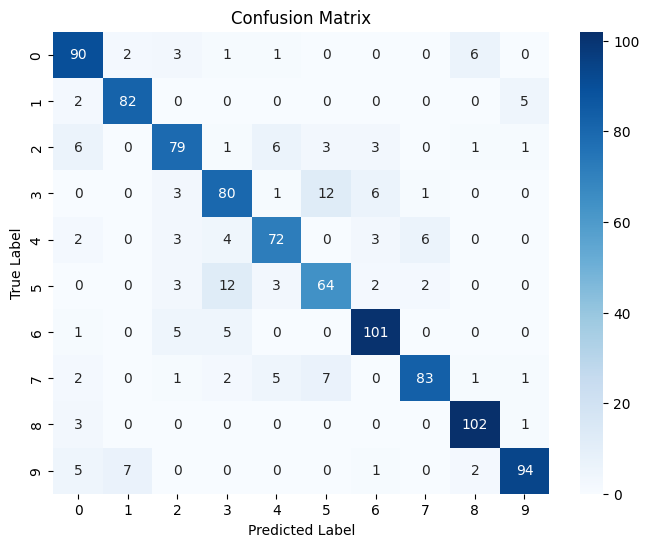

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()